In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from typing import List
from models import EmbeddingModel


/Users/taimurshaikh/Desktop/Coding/Side_Projects/TabZen/server/venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


/var/folders/w6/ggz_63f15v74qh97559bpz2r0000gn/T/ipykernel_98460/1733474316.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap="viridis")


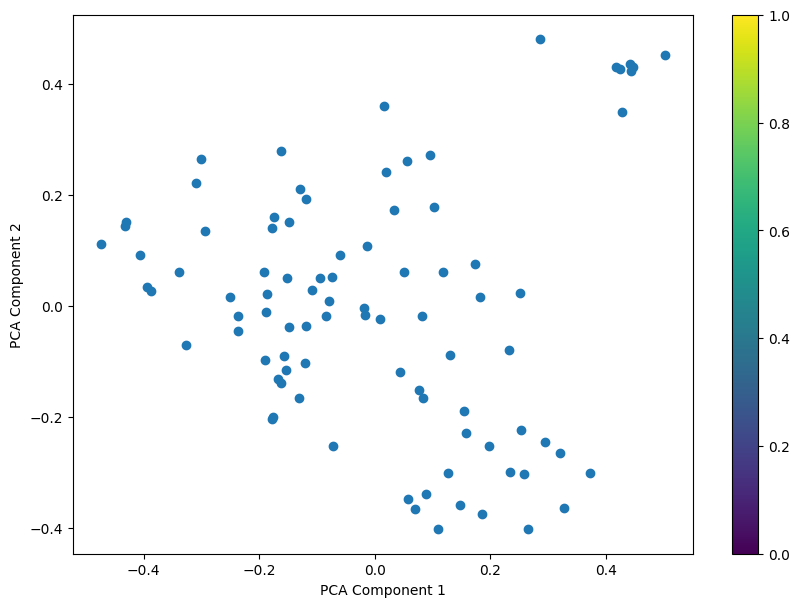

In [4]:
def generate_embeddings(texts: List[str]) -> np.ndarray:
    embedding_model = EmbeddingModel()
    embeddings = embedding_model.get_embeddings(texts)
    return embeddings


def apply_pca(embeddings: np.ndarray, n_components: int = 2) -> np.ndarray:
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    return reduced_embeddings


def visualize_embeddings(embeddings: np.ndarray, labels: List[str] = None) -> None:
    plt.figure(figsize=(10, 7))
    if embeddings.shape[1] == 2:
        plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap="viridis")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
    elif embeddings.shape[1] == 3:
        from mpl_toolkits.mplot3d import Axes3D

        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(
            embeddings[:, 0],
            embeddings[:, 1],
            embeddings[:, 2],
            c=labels,
            cmap="viridis",
        )
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
    else:
        raise ValueError("PCA can only visualize 2D or 3D embeddings.")
    plt.colorbar()
    plt.show()


# Example usage:

# Sample text data
sample_tabs = [
    "Google Search https://www.google.com",
    "YouTube Video https://www.youtube.com/watch?v=dQw4w9WgXcQ",
    "GitHub Repository https://github.com",
    "Twitter Profile https://twitter.com/user",
    "Facebook Home https://www.facebook.com",
    "Reddit Post https://www.reddit.com/r/programming/comments/abc123/example_post",
    "Stack Overflow Question https://stackoverflow.com/questions/12345678/example-question",
    "Amazon Product https://www.amazon.com/dp/B08L5VXYZ",
    "Netflix Movie https://www.netflix.com/watch/80117552",
    "Wikipedia Article https://en.wikipedia.org/wiki/Artificial_intelligence",
    "LinkedIn Profile https://www.linkedin.com/in/johndoe",
    "Instagram Photo https://www.instagram.com/p/abc123def456",
    "NY Times News https://www.nytimes.com/2024/07/07/us/sample-news.html",
    "CNN News https://www.cnn.com/2024/07/07/world/sample-news/index.html",
    "BBC News https://www.bbc.com/news/world-12345678",
    "Udemy Course https://www.udemy.com/course/sample-course",
    "Coursera Course https://www.coursera.org/learn/sample-course",
    "Medium Blog Post https://medium.com/@johndoe/sample-post-abc123",
    "Quora Question https://www.quora.com/How-does-sample-question",
    "Hacker News Article https://news.ycombinator.com/item?id=12345678",
    "Ebay Product https://www.ebay.com/itm/1234567890",
    "Spotify Song https://open.spotify.com/track/1234567890abcdef",
    "SoundCloud Track https://soundcloud.com/user/sample-track",
    "Pinterest Pin https://www.pinterest.com/pin/1234567890/",
    "Tumblr Post https://johndoe.tumblr.com/post/1234567890",
    "WhatsApp Web Chat https://web.whatsapp.com/",
    "Google Docs Document https://docs.google.com/document/d/abc123def456",
    "Google Sheets Spreadsheet https://docs.google.com/spreadsheets/d/abc123def456",
    "Google Drive Folder https://drive.google.com/drive/folders/abc123def456",
    "Dropbox File https://www.dropbox.com/s/abc123def456/sample-file",
    "Microsoft OneDrive File https://onedrive.live.com/?cid=abc123def456",
    "Apple iCloud File https://www.icloud.com/iclouddrive/abc123def456",
    "Trello Board https://trello.com/b/abc123def456/sample-board",
    "Asana Task https://app.asana.com/0/abc123def456/abc123def456",
    "Notion Page https://www.notion.so/johndoe/Sample-Page-abc123def456",
    "Slack Message https://app.slack.com/client/T12345678/C12345678",
    "Discord Channel https://discord.com/channels/1234567890/1234567890",
    "Microsoft Teams Chat https://teams.microsoft.com/l/chat/0/0?users=abc123def456",
    "Zoom Meeting https://zoom.us/j/1234567890",
    "Google Meet Meeting https://meet.google.com/abc-defg-hij",
    "Microsoft Word Online Document https://word.office.com/abc123def456",
    "Adobe Acrobat PDF https://acrobat.adobe.com/link/track?uri=urn:aaid:sc:VA6C2:abc123def456",
    "Canva Design https://www.canva.com/design/abc123def456",
    "Figma Design https://www.figma.com/file/abc123def456",
    "CodePen Pen https://codepen.io/johndoe/pen/abc123",
    "JSFiddle Fiddle https://jsfiddle.net/johndoe/abc123/",
    "Google Calendar Event https://calendar.google.com/calendar/u/0/r/eventedit/abc123def456",
    "Outlook Calendar Event https://outlook.live.com/calendar/0/deeplink/compose/abc123def456",
    "Twitch Stream https://www.twitch.tv/videos/123456789",
    "Dailymotion Video https://www.dailymotion.com/video/abc123def456",
    "Vimeo Video https://vimeo.com/123456789",
    "Udacity Course https://www.udacity.com/course/sample-course",
    "edX Course https://www.edx.org/course/sample-course",
    "Pluralsight Course https://www.pluralsight.com/courses/sample-course",
    "Lynda Course https://www.linkedin.com/learning/sample-course",
    "Skillshare Course https://www.skillshare.com/classes/sample-class",
    "Khan Academy Lesson https://www.khanacademy.org/lesson/abc123",
    "Duolingo Lesson https://www.duolingo.com/lesson/abc123",
    "Codecademy Lesson https://www.codecademy.com/courses/sample-course",
    "LeetCode Problem https://leetcode.com/problems/sample-problem",
    "HackerRank Challenge https://www.hackerrank.com/challenges/sample-challenge",
    "Codewars Kata https://www.codewars.com/kata/abc123",
    "Kaggle Dataset https://www.kaggle.com/datasets/sample-dataset",
    "GitLab Repository https://gitlab.com/johndoe/sample-repo",
    "Bitbucket Repository https://bitbucket.org/johndoe/sample-repo",
    "Heroku App https://sample-app.herokuapp.com",
    "AWS Management Console https://aws.amazon.com/console/",
    "GCP Console https://console.cloud.google.com/",
    "Azure Portal https://portal.azure.com/",
    "DigitalOcean Dashboard https://cloud.digitalocean.com/",
    "Linode Manager https://manager.linode.com/",
    "Vultr Dashboard https://my.vultr.com/",
    "Netlify Dashboard https://app.netlify.com/sites",
    "Vercel Dashboard https://vercel.com/dashboard",
    "GitHub Actions https://github.com/johndoe/sample-repo/actions",
    "CircleCI Pipeline https://circleci.com/gh/johndoe/sample-repo",
    "Travis CI Build https://travis-ci.org/github/johndoe/sample-repo",
    "Jenkins Job https://jenkins.io/job/sample-job",
    "Docker Hub https://hub.docker.com/r/johndoe/sample-repo",
    "Kubernetes Dashboard https://kubernetes.io/docs/tasks/access-application-cluster/web-ui-dashboard/",
    "Ansible Playbook https://ansible.com/playbooks/abc123",
    "Terraform Module https://registry.terraform.io/modules/johndoe/sample-module",
    "Puppet Manifest https://puppet.com/docs/puppet/latest/manifests/abc123",
    "Chef Recipe https://docs.chef.io/recipes/abc123",
    "SaltStack State https://docs.saltstack.com/en/latest/ref/states/abc123",
    "OpenAI GPT-3 Playground https://beta.openai.com/playground/",
    "Hugging Face Model https://huggingface.co/models/abc123",
    "Google Colab Notebook https://colab.research.google.com/drive/abc123",
    "Jupyter Notebook https://jupyter.org/abc123"
]


# Generate embeddings
embeddings = generate_embeddings(sample_tabs)

# Apply PCA
reduced_embeddings = apply_pca(
    embeddings, n_components=2
)  # Change to 3 for 3D visualization

# Visualize embeddings
visualize_embeddings(reduced_embeddings)

In [5]:
from sklearn.manifold import TSNE
from typing import List

# Assuming the EmbeddingModel class is already defined as in your script

def generate_embeddings(texts: List[str]) -> np.ndarray:
    embedding_model = EmbeddingModel()
    embeddings = embedding_model.get_embeddings(texts)
    return embeddings

def apply_tsne(embeddings: np.ndarray, n_components: int = 2) -> np.ndarray:
    tsne = TSNE(n_components=n_components, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    return reduced_embeddings

def visualize_embeddings(embeddings: np.ndarray, labels: List[str] = None) -> None:
    plt.figure(figsize=(10, 7))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar()
    plt.show()

# Sample tab data
sample_tabs = [
    "Google Search https://www.google.com",
    "YouTube Video https://www.youtube.com/watch?v=dQw4w9WgXcQ",
    "GitHub Repository https://github.com",
    # Add more sample tabs as needed...
]

# Generate embeddings
embeddings = generate_embeddings(sample_tabs)

# Apply t-SNE
reduced_embeddings = apply_tsne(embeddings, n_components=2)  # Change to 3 for 3D visualization

# Visualize embeddings
visualize_embeddings(reduced_embeddings)

ValueError: perplexity must be less than n_samples